<a href="https://colab.research.google.com/github/CelikAbdullah/my-deep-learning-notebooks/blob/main/image%20classification/Image_Classification_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Some imports

In [98]:
from tensorflow import keras
import matplotlib.pyplot as plt

# Getting the CIFAR10 dataset

In [99]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [100]:
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

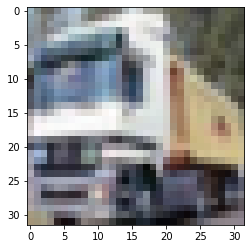

In [101]:
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.show()

# Creating the validation dataset

In [102]:
x_val = x_train[:10000]
x_train = x_train[10000:]

y_val = y_train[:10000]
y_train = y_train[10000:]

# One-hot encoding of the targets

In [103]:
y_train = keras.utils.to_categorical(y_train)
y_val = keras.utils.to_categorical(y_val)
y_test = keras.utils.to_categorical(y_test)


# Data augmentation

In [104]:
data_augmentation = keras.Sequential(
    [
     keras.layers.RandomFlip("horizontal_and_vertical"),
     keras.layers.RandomRotation(0.2),
    ]
)

# Building the model

In [105]:
def conv_block(x, filters, d_rate):
  x = keras.layers.Conv2D(filters, 3, padding="same", use_bias=False)(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.Activation(activation="relu")(x)
  x = keras.layers.Conv2D(filters, 3, padding="same", use_bias=False)(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.Activation(activation="relu")(x)
  x = keras.layers.MaxPooling2D(2)(x)
  x = keras.layers.Dropout(d_rate)(x)
  return x

In [106]:
inputs = keras.Input(shape=(32,32,3))
augmented_data = data_augmentation(inputs)
rescaled_inputs = keras.layers.Rescaling(1.0/255)(augmented_data)

# 1st block
x = conv_block(rescaled_inputs, 32, 0.2)
# 2nd block
x = conv_block(x, 64, 0.3)
# 3rd block
x = conv_block(x, 384, 0.4)
# 4th block
x = conv_block(x, 384, 0.4)

# 5th block
x = conv_block(x, 256, 0.5)

x = keras.layers.Flatten()(x)
x = keras.layers.Dense(256, activation="relu")(x)
x = keras.layers.Dropout(0.5)(x)
outputs = keras.layers.Dense(10, activation="softmax")(x)

cifar10_model = keras.Model(inputs = inputs, outputs = outputs)
cifar10_model.summary()

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 sequential_4 (Sequential)   (None, 32, 32, 3)         0         
                                                                 
 rescaling_17 (Rescaling)    (None, 32, 32, 3)         0         
                                                                 
 conv2d_204 (Conv2D)         (None, 32, 32, 32)        864       
                                                                 
 batch_normalization_188 (Ba  (None, 32, 32, 32)       128       
 tchNormalization)                                               
                                                                 
 activation_188 (Activation)  (None, 32, 32, 32)       0         
                                                          

# Compiling the model

In [107]:
optimizer = "adam";
loss = "categorical_crossentropy"
metrics = ["accuracy"]

cifar10_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

# Setting up some callbacks

In [108]:
callbacks = [
             keras.callbacks.ModelCheckpoint("/content/drive/MyDrive/mnist/model_for_cifar_10_img_classification.h5", 
                                             save_best_only=True, 
                                             monitor ="val_loss"), 
             keras.callbacks.EarlyStopping(patience=20)
]

# Training the model

In [109]:
epoch_nr = 100
batch_size = 128
validation_data = (x_val, y_val)

history_cifar10_model = cifar10_model.fit(x=x_train, y=y_train, epochs=epoch_nr, batch_size=batch_size, validation_data=validation_data, callbacks=callbacks)

Epoch 1/100
313/313 [==============================] - 15s 39ms/step - loss: 2.1502 - accuracy: 0.1933 - val_loss: 2.8308 - val_accuracy: 0.1702
Epoch 2/100
313/313 [==============================] - 11s 34ms/step - loss: 1.8897 - accuracy: 0.2707 - val_loss: 2.9663 - val_accuracy: 0.2050
Epoch 3/100
313/313 [==============================] - 11s 36ms/step - loss: 1.7843 - accuracy: 0.3127 - val_loss: 1.6595 - val_accuracy: 0.3511
Epoch 4/100
313/313 [==============================] - 11s 34ms/step - loss: 1.6933 - accuracy: 0.3544 - val_loss: 1.7188 - val_accuracy: 0.3535
Epoch 5/100
313/313 [==============================] - 11s 34ms/step - loss: 1.6005 - accuracy: 0.3973 - val_loss: 1.7276 - val_accuracy: 0.3796
Epoch 6/100
313/313 [==============================] - 11s 34ms/step - loss: 1.5241 - accuracy: 0.4286 - val_loss: 2.1605 - val_accuracy: 0.3078
Epoch 7/100
313/313 [==============================] - 11s 34ms/step - loss: 1.4583 - accuracy: 0.4584 - val_loss: 1.6947 - val_ac

# Plotting the results

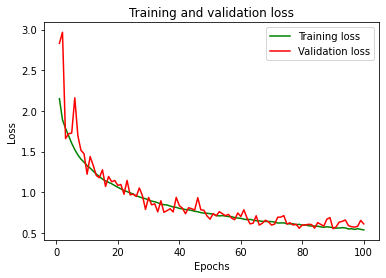

In [110]:
history = history_cifar10_model.history

train_loss = history["loss"]
val_loss = history["val_loss"]

train_acc = history["accuracy"]
val_acc = history["val_accuracy"]

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, linestyle="solid", color="green", label="Training loss")
plt.plot(epochs, val_loss, linestyle="solid", color="red", label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

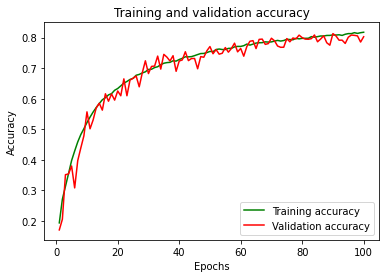

In [111]:
plt.plot(epochs, train_acc, linestyle="solid", color="green", label="Training accuracy")
plt.plot(epochs, val_acc, linestyle="solid", color="red", label="Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.show()

# Load the model

In [112]:
cifar10_model = keras.models.load_model("/content/drive/MyDrive/mnist/model_for_cifar_10_img_classification.h5")

# Evaluate the model

In [113]:
test_loss, test_accuracy = cifar10_model.evaluate(x=x_test, y=y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.5810 - accuracy: 0.8026


In [114]:
print(f"Test accuracy on new unseen data is {test_accuracy * 100}%")

Test accuracy on new unseen data is 80.26000261306763%
